### Submitted By:
    Ashlesha
    Pooja
    Pradeep
    Pratik

## SENTIMENT ANALYSIS

In [45]:
### IMPORTING NECESSARY LIBRARIES

import requests
import gensim
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

In [46]:
### Step 1: Web Scrapping

url = 'https://en.wikipedia.org/wiki/Asian_Games'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
paragraphs = soup.find_all('p')

In [47]:
### Step 2: Combine paragraphs into a single text

document = ' '.join([p.get_text() for p in paragraphs])

In [48]:
### Step 3: Sentiment Analysis

sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(document)

#### Determining the sentiments based on the sentiment_scores 


if sentiment_scores['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {sentiment_scores}")

Sentiment: Positive
Sentiment Scores: {'neg': 0.047, 'neu': 0.882, 'pos': 0.07, 'compound': 0.9894}


In [49]:
### Step 4: Text Summarization

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

def custom_summarize(document, num_sentences=2):
    # Tokenize the document into words and sentences
    words = word_tokenize(document)
    sentences = sent_tokenize(document)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

In [50]:
# Calculate word frequencies
    word_freq = FreqDist(filtered_words)

    # Calculate sentence scores based on word frequencies
    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_freq[word]
                else:
                    sentence_scores[sentence] += word_freq[word]

    # Choose the top N sentences as the summary 
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:num_sentences]

    # Create the summary
    summary = ' '.join(summary_sentences)

    return summary

IndentationError: unexpected indent (3204030525.py, line 2)

In [51]:
def custom_keywords(document, num_keywords=15):
    # Tokenize the document into words
    words = word_tokenize(document)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Calculate word frequencies
    word_freq = FreqDist(filtered_words)

    # Choose the top N keywords 
    keywords = [word for word, freq in word_freq.most_common(num_keywords)]

    return keywords


In [52]:
### Step 5: Extract Keywords

# Summarize the document (specify the number of sentences for the summary)
summary = custom_summarize(document, num_sentences=5)

# Extract keywords from the document (specify the number of keywords)
keywords = custom_keywords(document, num_keywords=15)

# Print the summary and keywords
print("Summary:")
print(summary)

print("\nKeywords:")
print(keywords)


print("\nText Summary:")
print(summary)

print("\nKeywords:")
print(keywords)


Summary:
None

Keywords:
['games', 'asian', 'olympic', 'host', 'held', 'asia', 'federation', 'oca', 'events', 'israel', 'due', 'nations', 'participation', 'china', 'since']

Text Summary:
None

Keywords:
['games', 'asian', 'olympic', 'host', 'held', 'asia', 'federation', 'oca', 'events', 'israel', 'due', 'nations', 'participation', 'china', 'since']


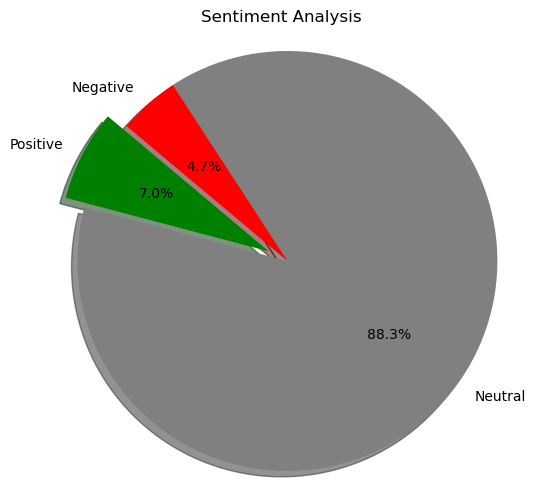

In [53]:
### SENTIMENT ANALYSIS
labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_scores['pos'], sentiment_scores['neu'], sentiment_scores['neg']]
colors = ['green', 'gray', 'red']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


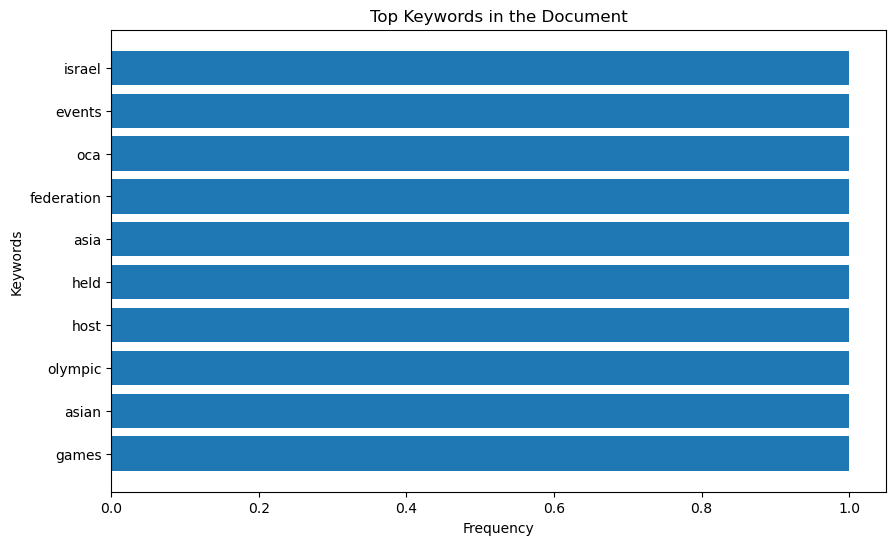

In [54]:
### KEYWORDS

import matplotlib.pyplot as plt

keyword_freq = nltk.FreqDist(keywords)
top_n_keywords = keyword_freq.most_common(10)  

# Extracting the keywords and their frequencies
keywords, frequencies = zip(*top_n_keywords)

plt.figure(figsize=(10, 6))
plt.barh(keywords, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top Keywords in the Document')
plt.show()


### now we are doing the sentiment analysis for the one product review based on flipkart site

# Web Scrapping for a reviews of particular product

Data scraping is one of the most used ways to collect data. In simple terms it means, to get HTML code for a webpage and scan it for data.

In [17]:
from time import sleep
from random import random
import pandas as pd
import requests
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import urllib.parse as urlparse
from urllib.parse import parse_qs

In [18]:
# Constants
BASE_URL = 'https://www.flipkart.com/'
SEARCH_QUERY = "headphones"
TOP_N_PRODUCTS = 10
REVIEW_PAGES_TO_SCRAPE_FROM_PER_PRODUCT = 100

# Requesting Desired Webpage

In [19]:
SAMPLE_URL = "https://www.flipkart.com/boat-rockerz-400-bluetooth-headset/product-reviews/itm14d0416b87d55?pid=ACCEJZXYKSG2T9GS&lid=LSTACCEJZXYKSG2T9GSVY4ZIC&marketplace=FLIPKART&page=1"
r = requests.get(SAMPLE_URL)    
soup = BeautifulSoup(r.content, 'html.parser') 
print(soup.prettify()[:500])

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <meta content="website" property="og:type"/>
  <meta content="width=device-width,minimum-scale=1,user-scalable=no" name="viewport"/>
  <meta 


# Test for a single product review page

In [32]:
# Extracting all review blocks
rows = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})
print(f"Count of rows(reviews):{len(rows)}\n\n\n")
# iteration over all blocks
for row in rows:
    # Print a sample row(review html block)
    # print(f"row:\n{row} \n\n")
    
    # finding all rows within the block
    sub_row = row.find_all('div',attrs={'class':'row'})
        
    # extracting text from 1st and 2nd row
    rating = sub_row[0].find('div').text
    print(f"rating:{rating} \n\n")
    
    summary = sub_row[0].find('p').text
    print(f"summary:{summary} \n\n")
    
    review = sub_row[1].find_all('div')[2].text
    print(f"review:{review} \n\n")
    
    location = sub_row[3].find('p',attrs={'class':'_2mcZGG'}).find_all('span')[1].text
    location = "".join(location.split(",")[1:]).strip()
    print(f"location:{location} \n\n")
    
    date = sub_row[3].find_all('p',attrs={'class':'_2sc7ZR'})[1].text
    print(f"date:{date} \n\n")
    
    
    sub_row_2 = row.find_all('div',attrs={'class':'_1e9_Zu'})[0].find_all('span',attrs={'class':'_3c3Px5'})
    
    upvotes = sub_row_2[0].text
    print(f"upvotes:{upvotes} \n\n")
    
    downvotes = sub_row_2[1].text
    print(f"downvotes:{downvotes} \n\n")
    
    break

Count of rows(reviews):0





# Search based Product URL Discovery

In [33]:
def get_popular_product_s_titles_and_urls(search_query : str, popular_products_count_limit : int = None):
    
    search_url = f"{BASE_URL}search?q={search_query}&sort=popularity"
    search_response = requests.get(search_url)
    
    # Pause the loop for 1-3 seconds to simulate natural setting not overwhelm the server with back to back requests without any pause
    # sleep(randint(1,3))
    
    search_html_soup = BeautifulSoup(search_response.content, 'html.parser')
    search_results_products = search_html_soup.find_all('div',attrs={'class':'_4ddWXP'})
    
    product_titles, product_urls = [],[]
    
    product_count = 0
    
    for product in tqdm(search_results_products, desc="Search Results Iteration", position=0, leave=True):
        
        ad_mention_subrow = product.find("div", attrs={"class":"_4HTuuX"})
        
        is_ad = not not ad_mention_subrow
        
        if not is_ad:
            
            title_mention_subrow = product.find("a", attrs={"class":"s1Q9rs"})
            
            product_title = title_mention_subrow["title"]
            product_relative_url = title_mention_subrow["href"]
            product_url = urljoin(BASE_URL,product_relative_url)
            
            parsed_url = urlparse.urlparse(product_url)
            parsed_url_path = parsed_url.path
            parsed_url_path_split = parsed_url_path.split("/")
            parsed_url_path_split[2] = "product-reviews"
            parsed_url_path_modified = "/".join(parsed_url_path_split)
            parsed_url_modified = parsed_url._replace(path=parsed_url_path_modified)
            product_url = parsed_url_modified.geturl()
            
            product_titles.append(product_title)
            product_urls.append(product_url)
            
            product_count += 1
            
            if popular_products_count_limit and (product_count >= popular_products_count_limit):
                break
                
    return product_titles, product_urls

## Collect Product Page URLs for Top 10 Popular Products for 'Headphones' search query

### Specify Search Query and Popular Product Count Limit(optional)

In [34]:
product_titles, product_urls = get_popular_product_s_titles_and_urls(SEARCH_QUERY, TOP_N_PRODUCTS);

Search Results Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

# Iterating over multiple products and multiple pages

In [35]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["# Products", "# Reviews Per Page", "# Pages", "# Total Reviews Count"]
x.add_row([len(product_urls), 10, REVIEW_PAGES_TO_SCRAPE_FROM_PER_PRODUCT, len(product_urls)*10*REVIEW_PAGES_TO_SCRAPE_FROM_PER_PRODUCT])
print(x)

+------------+--------------------+---------+-----------------------+
| # Products | # Reviews Per Page | # Pages | # Total Reviews Count |
+------------+--------------------+---------+-----------------------+
|     10     |         10         |   100   |         10000         |
+------------+--------------------+---------+-----------------------+


In [36]:
dataset = []

for idx, url in enumerate(tqdm(product_urls, desc='products')):
    # iterating over review pages
    for i in tqdm(range(1,REVIEW_PAGES_TO_SCRAPE_FROM_PER_PRODUCT+1), desc="review pages", position=0, leave=False):
        parsed = urlparse.urlparse(url)
        pid = parse_qs(parsed.query)['pid'][0]
        URL = f"{url}&page={i}"
        
        r = requests.get(URL)
        
        # Pause the loop for 0-1 seconds to simulate natural setting not overwhelm the server with back to back requests without any pause
        sleep(random())
        soup = BeautifulSoup(r.content, 'html.parser') 

        rows = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})

        for row in rows:

            # finding all rows within the block
            sub_row = row.find_all('div',attrs={'class':'row'})

            # extracting text from 1st 2nd and 4th row
            rating = sub_row[0].find('div').text
            summary = sub_row[0].find('p').text
            summary = summary.strip()
            review = sub_row[1].find_all('div')[2].text
            review = review.strip()
            location=""
            location_row = sub_row[3].find('p',attrs={'class':'_2mcZGG'})
            if location_row:
                location_row = location_row.find_all('span')
                if len(location_row)>=2:
                    location = location_row[1].text
                    location = "".join(location.split(",")[1:]).strip()
            date = sub_row[3].find_all('p',attrs={'class':'_2sc7ZR'})[1].text

            sub_row_2 = row.find_all('div',attrs={'class':'_1e9_Zu'})[0].find_all('span',attrs={'class':'_3c3Px5'})

            upvotes = sub_row_2[0].text
            downvotes = sub_row_2[1].text

            # appending to data
            dataset.append({'product_id':pid, 'product_title':product_titles[idx], 'rating': rating, 'summary': summary, 'review': review, 'location' : location, 'date' : date, 'upvotes' : upvotes, 'downvotes' : downvotes})

products:   0%|          | 0/10 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

review pages:   0%|          | 0/100 [00:00<?, ?it/s]

# View Sample set of reviews that we collected

In [37]:
df = pd.DataFrame(dataset)

with pd.option_context('display.max_colwidth', 0):
    display(df.head(5))
    display(df.tail(5))

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFKYE2ARGG67WC,realme Buds 2 Wired Headset,5,Perfect product!,awesome sounds quality & feel the real bass,Gurugram,"Nov, 2019",183,30
1,ACCFKYE2ARGG67WC,realme Buds 2 Wired Headset,5,Must buy!,"Worth of money.Lajwaab after using 15 days.Quality,bass all are like a high quality of earphone.You will not get any outside disturbance.",New Delhi,"Nov, 2019",317,58
2,ACCFKYE2ARGG67WC,realme Buds 2 Wired Headset,5,Terrific,"woww fantastic experience 😍 👍 and mainly discuss about this earphones is built quality is awesome 👌👍im fully satisfied with this earphones 👌👌👍 prons 1. built quality is awesome2. sound quality is just super 3. bass , treble,mid ranges are just good4. long and comfortable cable cons 1. missed L shape jackfinally my overall rating is 9.6 /10",Kondapalli,"Jan, 2020",887,192
3,ACCFKYE2ARGG67WC,realme Buds 2 Wired Headset,5,Mind-blowing purchase,It's a great product according to the price and its sound quality and bass is perfect.Realme Buds 2 really its a great headphone.In this price range best headphone ever.❤️,Durgapur,"May, 2020",407,83
4,ACCFKYE2ARGG67WC,realme Buds 2 Wired Headset,5,Great product,best earphones at this range..,Guwahati,"Nov, 2019",113,19


,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
2002,ACCGC92BJHKATCDB,"Fire-Boltt Fire Pods Ninja G201 Earbuds TWS IWP HD Calls, Quick Charge 24hrs playback Bluetooth Headset",5,Fabulous!,Good sound quality and performance,Mysuru,21 days ago,0,0
2003,ACCGC92BJHKATCDB,"Fire-Boltt Fire Pods Ninja G201 Earbuds TWS IWP HD Calls, Quick Charge 24hrs playback Bluetooth Headset",5,Excellent,Nice soundVery small cute podsPocketable caseType c chargerNice and good,Thiruvarur District,21 days ago,0,0
2004,ACCGC92BJHKATCDB,"Fire-Boltt Fire Pods Ninja G201 Earbuds TWS IWP HD Calls, Quick Charge 24hrs playback Bluetooth Headset",5,Great product,Good quality,Nainpur,21 days ago,0,0
2005,ACCGC92BJHKATCDB,"Fire-Boltt Fire Pods Ninja G201 Earbuds TWS IWP HD Calls, Quick Charge 24hrs playback Bluetooth Headset",5,Highly recommended,Amazing product at this price I love fireboltt products.Bass 5/5Sound5/5Build quaility 5/5Value for money 5/5,Rohtas District,21 days ago,0,0
2006,ACCGC92BJHKATCDB,"Fire-Boltt Fire Pods Ninja G201 Earbuds TWS IWP HD Calls, Quick Charge 24hrs playback Bluetooth Headset",5,Terrific,It's great ...battery backup is amazing and sound quality is also good,Jaipur,21 days ago,0,0


In [38]:
count_reviews = df.shape[0]
print(f"Count of reviews:{count_reviews}")

Count of reviews:2007


In [39]:
from textblob import TextBlob

# Create empty lists to store sentiment polarity and labels
sentiment_polarities = []
sentiment_labels = []

# Iterate through the 'review' column of the DataFrame
for review in df['review']:
    analysis = TextBlob(review)

    # Get sentiment polarity (-1 to 1: negative to positive)
    sentiment_polarity = analysis.sentiment.polarity

    # Determine sentiment label based on polarity
    if sentiment_polarity > 0:
        sentiment_label = "Positive"
    elif sentiment_polarity < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    # Append sentiment results to lists
    sentiment_polarities.append(sentiment_polarity)
    sentiment_labels.append(sentiment_label)

# Add sentiment polarity and label columns to the DataFrame
df['sentiment_polarity'] = sentiment_polarities
df['sentiment_label'] = sentiment_labels

# Print the DataFrame with sentiment analysis results
print(df[['review', 'sentiment_polarity', 'sentiment_label']])


                                                 review  sentiment_polarity  \
0           awesome sounds quality & feel the real bass            0.387500   
1     Worth of money.Lajwaab after using 15 days.Qua...            0.153333   
2     woww fantastic experience 😍 👍 and mainly discu...            0.300000   
3     It's a great product according to the price an...            0.508333   
4                        best earphones at this range..            1.000000   
...                                                 ...                 ...   
2002                 Good sound quality and performance            0.550000   
2003  Nice soundVery small cute podsPocketable caseT...            0.387500   
2004                                      Good  quality            0.700000   
2005  Amazing product at this price I love fireboltt...            0.550000   
2006  It's great ...battery backup is amazing and so...            0.625000   

     sentiment_label  
0           Positive  
1    

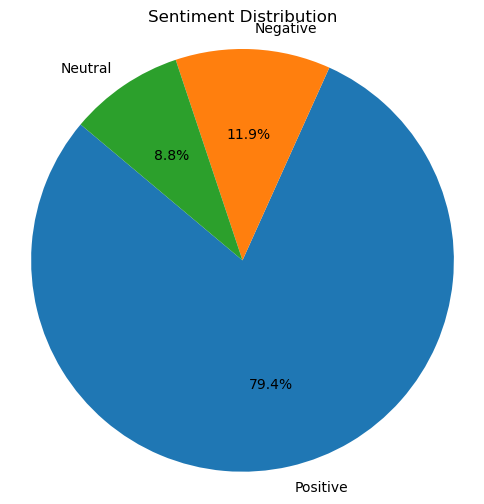

In [40]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'sentiment_label' and calculate the count of each label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
